In [1]:
pip install selenium pandas webdriver-manager

Note: you may need to restart the kernel to use updated packages.


In [2]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import time
from tqdm.notebook import tqdm
from bs4 import BeautifulSoup as bs
import pandas as pd

In [3]:
url ='https://search.naver.com/search.naver?sm=tab_hty.top&ssc=tab.blog.all&query=%EC%9E%84%EC%8B%A0+%EA%B8%B0%EB%A1%9D&oquery=%EC%9E%84%EC%8B%A0&tqi=jebTElqVOZCsskX8E58ssssstMV-001702&ackey=5hd7wblk'

In [4]:
keyword = '임신 기록'
start_date = '20201101'
end_date='20251101'
blog_search_url = f'https://search.naver.com/search.naver?ssc=tab.blog.all&query={keyword}&sm=tab_opt&nso=so%3Ar%2Cp%3Afrom{start_date}to{end_date}'

In [5]:
driver = webdriver.Chrome()
driver.get(blog_search_url)
driver.maximize_window()

In [6]:
import time

for i in range(10):
    body = driver.find_element(By.TAG_NAME, 'body')
    body.send_keys(Keys.END)
    time.sleep(1.5)

In [7]:
#1. a태그 찾기
blog_titles = driver.find_elements(By.CLASS_NAME, 'title_link')
blog_titles

#2. href를 href_list에 append하기
href_list = []

for i in blog_titles:
    href = i.get_attribute("href")
    href_list.append(href)

href_list

[]

In [8]:
len(href_list)

0

In [9]:
# href_list에 있는 첫번째 블로그 페이지를 요청하기
driver.get(href_list[0])

IndexError: list index out of range

In [ ]:
#iframe으로 전환하기
driver.switch_to.frame('mainFrame')

In [ ]:
#제목 가져오기 : CLASS_NAME

title = driver.find_element(By.CLASS_NAME,'se-fs-.se-ff-')
title.text

'LG 엘지 광파오븐 렌지 빌트인 내돈내산 단점 후기'

In [ ]:
#내용(본문) 가져오기 : CLASS_NAME

content = driver.find_element(By.CLASS_NAME,'se-main-container')
content.text

"LG 엘지 광파오븐 렌지\n빌트인 내돈내산 단점 후기\n최근에 이사하면서 가구부터 가전제품을\n싹 다- 새로 바꾸었어요. 빌트인이었던 것들도 있어서\n이번에 새로 다 장만해야만 했는데요.\n인테리어에 걸맞게(?)\n가전제품은 고렴이로 제대로 된 것들을\n내돈내산 하자는 취지에서 완전 탕진잼\n엘지 광파오븐 렌지&에어프라이어도\n그중 하나랍니당\n엘지 LG오브제 광파오븐 렌지 32L\n카밍베이지 / MLJ32ERS.CKOR\n오븐은 잘 사용하지 않고, 에어프라이어 따로\n전자레인지는 빌트인이라 구입해야 했는데\n주방 인테리어 & 공간 활용을 위해\n모두 다 하나로 끝낼 수 있는\nLG 광파오븐 빌트인으로 들였어요.\n에어수비드, 에어프라이, 오븐, 구이\n전자레인지, 발효, 스팀, 식품건조,\n슬로우쿡, 토스트까지 다 할 수 있다고.\n그런데 거의 엘지 광파오븐 렌지로만 사용 중 ㅋㅋㅋ\n요리 알못 1인...하핫..\n히든 핸들과 플랫도어,\n미니멀한 디자인으로 세련되니 너무 이쁘죠?\n손잡이는 튀어나오지 않고,\n상단에 히든 손잡이가 있어서\n더 깔끔하고 예쁘더라고요.\n물론, 여닫기도 편하고요.\n작년 거랑 별 차이가 없는데\n디자인에서 미묘한 차이가 있더라고요.\n저희는 주방 인테리어에 어울리게\n카밍 베이지를 골랐는데 도어 패널은\n따로 사서 교체할 수도 있다고 하네용\n4가지 컬러로 다양하니 취향껏, 골라보시길.\n사용법\n설명서도 함께 있지만, 따로 읽지 않아도 될 정도로\n사용방법은 직관적이긴 했어요.\n주요 기능은 디스플레이 터치로 하는데\n전자레인지가 기본 셋팅이구요.\n딱 그 부분을 눌러야 터치가 돼요.\n소리도 나고, 내가 선택한 주요 기능이\n디스플레이에 뜨기 때문에 헷갈릴 일도 없고요.\n다이얼을 돌려서 원하는 기능을 선택하셔도 되고,\n디테일한 시간이나 온도 등을 설정할 때도\n다이얼로 설정해요.\n돌릴 때마다 소리가 나고\n내가 선택한 시간/온도가 정확하게 표시되니까\n실수할 일도 없다는 거.\n다이얼을 돌려서 설정을 마친 뒤,\n다

In [ ]:
#날짜 가져오기 : CSS_SELECTOR
date = driver.find_element(By.CSS_SELECTOR,'.se_publishDate.pcol2')
date.text

'2025. 4. 9. 20:35'

In [ ]:
# 수집한 데이터를 담을 리스트
df = []
# 실패한 URL과 오류 사유를 저장할 빈 리스트
failed_url = []  

# 브라우저 실행하기
driver = webdriver.Chrome()

# href_list 순회하며 데이터 수집하기
for href in href_list:
    try:
        # 1) 페이지 요청하기
        driver.get(href)
        # 페이지 로딩 대기

        # 2) iframe으로 전환하기
        driver.switch_to.frame('mainFrame')

        # 3) 제목 추출하기
        title = driver.find_element(By.CLASS_NAME, 'se-fs-.se-ff-nanummaruburi').text
	
        # 4) 내용 추출하기
        content = driver.find_element(By.CLASS_NAME, 'se-main-container').text

        # 5) 날짜 추출하기
        date = driver.find_element(By.CSS_SELECTOR,'.se_publishDate.pcol2').text

        # 6) df 리스트에 제목, 내용, 날짜, URL 추가하기
        df.append([title, content, date, href])

    except Exception as e:
        # 오류 발생 시 failed_url에 href와 에러 사유 추가하기
        failed_url.append([href, str(e)])

# 7) 드라이버 종료하기
driver.quit()

# 결과 확인
df, failed_url

([['- 수리 받으러 갔다가 들은 소식',
   '- 수리 받으러 갔다가 들은 소식\n\'오븐팬 회수명령\' -\n© 2025. @오옐리 all rights reserved.\n쿠쿠 CMW-C3020OEGW 구매\n7개월 사용 후기와 장단점\n쿠쿠 멀티 광파오븐 리콜 소식\n리콜 대상 모델명과 교환 방법\n쿠쿠 고객센터 A/S 경험담\n하이마트와 쿠쿠의 대응 비교\n동일 모델 보유자 꼭 확인하세요!\n몇개월간 불편했던거\n남편 휴가철 맞아\n수리 맡기러 갔더니\n알고 오셨어요?\n알고보니 부속품인 오븐팬의 리콜\n회수명령 조치가 있었다고 하더라고요.\n집에와서 홈페이지도 들어가보고\n문의글도 남겨보면서\n알게된 내용 알려드릴게요~!\n수리 맡겨서 사진이 이거 밖에 없네요..ㅎㅎ\n1. 쿠쿠 CMW-C3020OEGW 구매 (하이마트)\n제품명 : CMW-C3020OEGW\n경산하이마트 25년 1월 25일 구매 판매자명 OO숙\n주문번호 : 20250125-****-**\n저희집에 사용하고 있던 전자렌지가\n수명을 다하게 되서\n고르고 골라 가성비 좋은\n광파오븐 올 연초에 구매했었어요.\n하이마트에서 카드 개설도 해서\n할인 꽤 받고 만족스런 금액으로\n구매했죠.\n삼성 LG 좋은거 알지만\n요리를 잘 하지 못하기 때문에\n\'하얗고\' \'3 in 1\' 만되면 족했죠.\n2. 내돈내산 7개월 사용 후기와 장단점\n전자레인지, 오븐, 에어프라이기\n이 모든걸 합쳐서 사용할 수 있어서\n너무 좋았어요.\n사실 공간이 협소해서\n따로따로 3개를 두는거보다\n하나로 두는게 관리적인 측면에서도\n좋을거라 판단했구요.\n< 장점 >\n· 디자인이 하얗고 깔끔하다\n· 문 여닫는 그립감이 좋았다.\n· 7 in 1 기능이 충분하다.\n(전저레인지, 에어프라이어, 오븐,\n그릴, 발효, 건조, 해동,)\n· A/S가 용이하다.\n· 가격이 적당하다.\n(20만원대)\n· 성능이 좋아 짧은시간으로도 금방 조리된다.\n한 2~3개월 썼을 때 즘\n뭔가 좀 이상했어요.\n생각

In [ ]:
#df를 데이터프레임으로 만들기
import pandas as pd

blog_df = pd.DataFrame(df, columns=['제목','내용','날짜','주소'])
blog_df.head()

,제목,내용,날짜,주소
0,- 수리 받으러 갔다가 들은 소식,- 수리 받으러 갔다가 들은 소식\n'오븐팬 회수명령' -\n© 2025. @오옐리...,2025. 8. 10. 17:00,https://blog.naver.com/oyelly_/223965529723
1,LG 광파오븐 32L (ML32EW1) 내돈내산 솔직 후기_ 아이와 함께 웨지감자 ...,"집에서 오븐 요리를 자주 하는 분들 중,\n오븐 교체를 고민하고 계신 분이라면\nL...",2025. 3. 13. 11:45,https://blog.naver.com/agiftfromtheheart/22379...
2,,윤도자기 차곡 오븐그릇\n안녕하세요.\n오븐요리할 때 꼭 필요한 오븐그릇\n어떤 걸...,2025. 2. 5. 8:00,https://blog.naver.com/dudn305/223747914161
3,필웰 데이아 광파 오븐 렌지대 구매 및 설치 (LG 디오스 오브제 광파오븐),LG 디오스 오브제 광파 오븐 수납장\n필웰 데이아 광파 오븐 렌지대\n#베란다수납...,2025. 6. 22. 7:12,https://blog.naver.com/travel_hans/223907394951
4,엘지광파오븐장 맞춤제작으로 편리성과 인테리어 효과까지,"고객님 요청사항\n🙋‍♀️블로그를 통해 광파오븐장 시공을 봤는데,\n너무 마음에 들...",2025. 6. 25. 12:12,https://blog.naver.com/yjhome3311/223911049952


In [ ]:
#. str.replace()
blog_df['내용'] = blog_df['내용'].str.replace('\n','')
blog_df

,제목,내용,날짜,주소
0,- 수리 받으러 갔다가 들은 소식,- 수리 받으러 갔다가 들은 소식'오븐팬 회수명령' -© 2025. @오옐리 all...,2025. 8. 10. 17:00,https://blog.naver.com/oyelly_/223965529723
1,LG 광파오븐 32L (ML32EW1) 내돈내산 솔직 후기_ 아이와 함께 웨지감자 ...,"집에서 오븐 요리를 자주 하는 분들 중,오븐 교체를 고민하고 계신 분이라면LG 광파...",2025. 3. 13. 11:45,https://blog.naver.com/agiftfromtheheart/22379...
2,,윤도자기 차곡 오븐그릇안녕하세요.오븐요리할 때 꼭 필요한 오븐그릇어떤 걸로 사용하고...,2025. 2. 5. 8:00,https://blog.naver.com/dudn305/223747914161
3,필웰 데이아 광파 오븐 렌지대 구매 및 설치 (LG 디오스 오브제 광파오븐),LG 디오스 오브제 광파 오븐 수납장필웰 데이아 광파 오븐 렌지대#베란다수납장 #광...,2025. 6. 22. 7:12,https://blog.naver.com/travel_hans/223907394951
4,엘지광파오븐장 맞춤제작으로 편리성과 인테리어 효과까지,"고객님 요청사항🙋‍♀️블로그를 통해 광파오븐장 시공을 봤는데,너무 마음에 들어서 연...",2025. 6. 25. 12:12,https://blog.naver.com/yjhome3311/223911049952
5,"바퀜 진공용기, 단점까지 짚어본 솔직후기",잘 지내셨어요?진공용기계에서는 이름 깨나 날리는 바퀜!저도 많이 들어본 브랜드라이름...,2024. 11. 27. 17:18,https://blog.naver.com/ljh6971/223674855241
6,진공 밀폐용기 바퀜 장점 단점 만족스런 사용후기,진공 용기의 혁신바퀜 마하 베이직 3종다이스바큐머 무선 진공기기copyright@푸...,2024. 12. 2. 22:15,https://blog.naver.com/hongmae1/223680375769
7,삼성 비스포크 인덕션(NZ63DB503CFT) & 콤펙트 전기오븐 (NQ50T853...,신혼집 마련하고 10년써야지 하고 구매했던 가전제품들을매매하면서 새주인한테 넘기고 ...,2025. 2. 2. 18:00,https://blog.naver.com/sehiyam/223745077420
8,서울 봉천동,<고객님 문의 사항>안녕하세요~ 이번에 결혼하게 되면서새로 가전을 싹 맞췄는데요. ...,2025. 6. 25. 9:03,https://blog.naver.com/cleaneye83/223910833943
9,스마트 오븐 선택? 삼성 비스포크 큐커 MO22A7797CF1 추천 이유,삼성 비스포크 큐커 MO22A7797CF1 리뷰 - 글램 베이지고급스러운 디자인과 ...,2024. 11. 5. 22:26,https://blog.naver.com/helmorgond3118/22364845...


In [ ]:
#날짜 전처리 : 슬라이싱 문법 사용

blog_df['날짜'] = blog_df['날짜'].str[:-6]
blog_df

,제목,내용,날짜,주소
0,- 수리 받으러 갔다가 들은 소식,- 수리 받으러 갔다가 들은 소식'오븐팬 회수명령' -© 2025. @오옐리 all...,2025. 8. 10.,https://blog.naver.com/oyelly_/223965529723
1,LG 광파오븐 32L (ML32EW1) 내돈내산 솔직 후기_ 아이와 함께 웨지감자 ...,"집에서 오븐 요리를 자주 하는 분들 중,오븐 교체를 고민하고 계신 분이라면LG 광파...",2025. 3. 13.,https://blog.naver.com/agiftfromtheheart/22379...
2,,윤도자기 차곡 오븐그릇안녕하세요.오븐요리할 때 꼭 필요한 오븐그릇어떤 걸로 사용하고...,2025. 2. 5,https://blog.naver.com/dudn305/223747914161
3,필웰 데이아 광파 오븐 렌지대 구매 및 설치 (LG 디오스 오브제 광파오븐),LG 디오스 오브제 광파 오븐 수납장필웰 데이아 광파 오븐 렌지대#베란다수납장 #광...,2025. 6. 22,https://blog.naver.com/travel_hans/223907394951
4,엘지광파오븐장 맞춤제작으로 편리성과 인테리어 효과까지,"고객님 요청사항🙋‍♀️블로그를 통해 광파오븐장 시공을 봤는데,너무 마음에 들어서 연...",2025. 6. 25.,https://blog.naver.com/yjhome3311/223911049952
5,"바퀜 진공용기, 단점까지 짚어본 솔직후기",잘 지내셨어요?진공용기계에서는 이름 깨나 날리는 바퀜!저도 많이 들어본 브랜드라이름...,2024. 11. 27.,https://blog.naver.com/ljh6971/223674855241
6,진공 밀폐용기 바퀜 장점 단점 만족스런 사용후기,진공 용기의 혁신바퀜 마하 베이직 3종다이스바큐머 무선 진공기기copyright@푸...,2024. 12. 2.,https://blog.naver.com/hongmae1/223680375769
7,삼성 비스포크 인덕션(NZ63DB503CFT) & 콤펙트 전기오븐 (NQ50T853...,신혼집 마련하고 10년써야지 하고 구매했던 가전제품들을매매하면서 새주인한테 넘기고 ...,2025. 2. 2.,https://blog.naver.com/sehiyam/223745077420
8,서울 봉천동,<고객님 문의 사항>안녕하세요~ 이번에 결혼하게 되면서새로 가전을 싹 맞췄는데요. ...,2025. 6. 25,https://blog.naver.com/cleaneye83/223910833943
9,스마트 오븐 선택? 삼성 비스포크 큐커 MO22A7797CF1 추천 이유,삼성 비스포크 큐커 MO22A7797CF1 리뷰 - 글램 베이지고급스러운 디자인과 ...,2024. 11. 5.,https://blog.naver.com/helmorgond3118/22364845...


In [ ]:
import pandas as pd
import re
from konlpy.tag import Okt
#1. 명사 추출 함수 정의하기
okt = Okt()

def extract_nouns(text):
    #1) tag 값이 'noun'이고 len(word)>=2 것들만 반환하기
    # nouns 리스트에 append(조건을 만족하면)
    nouns=[]
    #pos로 결과 값을 받아보면 : (단어, 품사)
    for word, tag in okt.pos(text):
        if tag == "Noun" and len(word) >=2:
            nouns.append(word)
    return nouns

In [ ]:
#2. 명사리스트 추출
blog_df["nouns"] = blog_df["내용"].apply(extract_nouns)
blog_df

,제목,내용,날짜,주소,nouns
0,- 수리 받으러 갔다가 들은 소식,- 수리 받으러 갔다가 들은 소식'오븐팬 회수명령' -© 2025. @오옐리 all...,2025. 8. 10.,https://blog.naver.com/oyelly_/223965529723,"[수리, 소식, 오븐, 회수, 명령, 오옐리, 쿠쿠, 구매, 개월, 사용, 후기, ..."
1,LG 광파오븐 32L (ML32EW1) 내돈내산 솔직 후기_ 아이와 함께 웨지감자 ...,"집에서 오븐 요리를 자주 하는 분들 중,오븐 교체를 고민하고 계신 분이라면LG 광파...",2025. 3. 13.,https://blog.naver.com/agiftfromtheheart/22379...,"[오븐, 요리, 자주, 오븐, 교체, 고민, 광파, 오븐, 모델, 광파, 오븐, 대..."
2,,윤도자기 차곡 오븐그릇안녕하세요.오븐요리할 때 꼭 필요한 오븐그릇어떤 걸로 사용하고...,2025. 2. 5,https://blog.naver.com/dudn305/223747914161,"[도자기, 차곡, 오븐, 그릇, 오븐, 요리, 오븐, 그릇, 사용, 도자기, 차곡,..."
3,필웰 데이아 광파 오븐 렌지대 구매 및 설치 (LG 디오스 오브제 광파오븐),LG 디오스 오브제 광파 오븐 수납장필웰 데이아 광파 오븐 렌지대#베란다수납장 #광...,2025. 6. 22,https://blog.naver.com/travel_hans/223907394951,"[디오스, 오브, 광파, 오븐, 수납, 필웰, 데이, 광파, 오븐, 지대, 베란다,..."
4,엘지광파오븐장 맞춤제작으로 편리성과 인테리어 효과까지,"고객님 요청사항🙋‍♀️블로그를 통해 광파오븐장 시공을 봤는데,너무 마음에 들어서 연...",2025. 6. 25.,https://blog.naver.com/yjhome3311/223911049952,"[고객, 요청, 사항, 블로그, 통해, 광파, 오븐, 시공, 마음, 연락, 저희, ..."
5,"바퀜 진공용기, 단점까지 짚어본 솔직후기",잘 지내셨어요?진공용기계에서는 이름 깨나 날리는 바퀜!저도 많이 들어본 브랜드라이름...,2024. 11. 27.,https://blog.naver.com/ljh6971/223674855241,"[진공, 용기, 이름, 깨나, 바퀜, 브랜드, 이름, 가격, 진입, 장벽, 때문, ..."
6,진공 밀폐용기 바퀜 장점 단점 만족스런 사용후기,진공 용기의 혁신바퀜 마하 베이직 3종다이스바큐머 무선 진공기기copyright@푸...,2024. 12. 2.,https://blog.naver.com/hongmae1/223680375769,"[진공, 용기, 혁신, 바퀜, 마하, 베이직, 다이스, 바큐머, 무선, 진공, 기기..."
7,삼성 비스포크 인덕션(NZ63DB503CFT) & 콤펙트 전기오븐 (NQ50T853...,신혼집 마련하고 10년써야지 하고 구매했던 가전제품들을매매하면서 새주인한테 넘기고 ...,2025. 2. 2.,https://blog.naver.com/sehiyam/223745077420,"[신혼집, 마련, 구매, 가전제품, 매매, 주인, 가전제품, 다시, 주방, 인테리어..."
8,서울 봉천동,<고객님 문의 사항>안녕하세요~ 이번에 결혼하게 되면서새로 가전을 싹 맞췄는데요. ...,2025. 6. 25,https://blog.naver.com/cleaneye83/223910833943,"[고객, 문의, 사항, 이번, 결혼, 가전, 제품, 머리, 광파, 오븐, 공간, 상..."
9,스마트 오븐 선택? 삼성 비스포크 큐커 MO22A7797CF1 추천 이유,삼성 비스포크 큐커 MO22A7797CF1 리뷰 - 글램 베이지고급스러운 디자인과 ...,2024. 11. 5.,https://blog.naver.com/helmorgond3118/22364845...,"[삼성, 스포크, 리뷰, 글램, 베이지, 디자인, 스마트, 기능, 삼성, 스포크, ..."


In [ ]:
#3. 단어별 빈도 계산하기 (Counter)
from collections import Counter

all_nouns = []

#df["nouns"]
for nouns in blog_df["nouns"]:
    all_nouns.extend(nouns)

In [ ]:
freq_dict = Counter(all_nouns)

In [ ]:
#상위 10개 단어 및 빈도 계산하기
top10 = freq_dict.most_common(20)
top10

[('오븐', 227),
 ('사용', 131),
 ('광파', 104),
 ('구매', 93),
 ('제품', 73),
 ('공간', 71),
 ('가전', 71),
 ('기능', 64),
 ('저희', 63),
 ('시공', 63),
 ('후기', 61),
 ('디자인', 61),
 ('설치', 57),
 ('진공', 57),
 ('요리', 53),
 ('인덕션', 50),
 ('인테리어', 50),
 ('할인', 49),
 ('선택', 49),
 ('찜질', 49)]

In [ ]:
len(blog_df)

26

In [ ]:
#볼 용어 처리하기 : '음식물', '처리기'
stopwords= ["음식물", "처리기"]

#새로운 필터링돤 리스트 생성을 위한 빈 리스트
filtered_nouns = []

for nouns in all_nouns:
    if nouns not in stopwords:
        filtered_nouns.append(nouns)

filtered_nouns

['수리',
 '소식',
 '오븐',
 '회수',
 '명령',
 '오옐리',
 '쿠쿠',
 '구매',
 '개월',
 '사용',
 '후기',
 '장단점',
 '쿠쿠',
 '멀티',
 '광파',
 '오븐',
 '리콜',
 '소식',
 '리콜',
 '대상',
 '모델',
 '명과',
 '교환',
 '방법',
 '쿠쿠',
 '고객',
 '센터',
 '험담',
 '하이마트',
 '쿠쿠',
 '대응',
 '비교',
 '동일',
 '모델',
 '보유',
 '확인',
 '몇개',
 '월간',
 '남편',
 '휴가',
 '부속품',
 '오븐',
 '리콜',
 '회수',
 '명령',
 '조치',
 '홈페이지',
 '보고',
 '문의',
 '내용',
 '수리',
 '사진',
 '쿠쿠',
 '구매',
 '하이마트',
 '제품',
 '경산',
 '하이마트',
 '구매',
 '판매',
 '자명',
 '숙주',
 '번호',
 '사용',
 '전자렌지',
 '가수',
 '가성',
 '은광',
 '오븐',
 '연초',
 '구매',
 '하이마트',
 '카드',
 '개설',
 '할인',
 '금액',
 '구매',
 '삼성',
 '요리',
 '때문',
 '개월',
 '사용',
 '후기',
 '장단점',
 '전자레인지',
 '오븐',
 '에어',
 '프라이',
 '기이',
 '사용',
 '사실',
 '공간',
 '협소',
 '따로따로',
 '하나로',
 '관리',
 '측면',
 '판단',
 '장점',
 '디자인',
 '기능',
 '레인지',
 '에어',
 '프라이어',
 '오븐',
 '그릴',
 '발효',
 '건조',
 '해동',
 '가격',
 '성능',
 '시간',
 '금방',
 '조리',
 '개월',
 '즘뭔',
 '생각',
 '소음',
 '내부',
 '청소',
 '무엇',
 '전자레인지',
 '에어',
 '프라',
 '이기',
 '무슨',
 '작동',
 '내부',
 '습기',
 '대한',
 '정보',
 '고장',
 '난건',
 '지난주',
 '남편',
 '단점',
 '소음',
 '딸딸딸딸',
 

In [ ]:
freq_dict = Counter(filtered_nouns)

top20 = freq_dict.most_common(20)
top20

[('오븐', 227),
 ('사용', 131),
 ('광파', 104),
 ('구매', 93),
 ('제품', 73),
 ('공간', 71),
 ('가전', 71),
 ('기능', 64),
 ('저희', 63),
 ('시공', 63),
 ('후기', 61),
 ('디자인', 61),
 ('설치', 57),
 ('진공', 57),
 ('요리', 53),
 ('인덕션', 50),
 ('인테리어', 50),
 ('할인', 49),
 ('선택', 49),
 ('찜질', 49)]

In [ ]:
#워드클라우드 그리기 위한 library import 찾기
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
#워드클라우드 객체 만들기
wc = WordCloud(
    font_path = 'C:/Windows/Fonts/malgunbd.ttf',
    background_color = 'white',
    width=800,
    height=600
).generate_from_frequencies(dict(freq_dict))

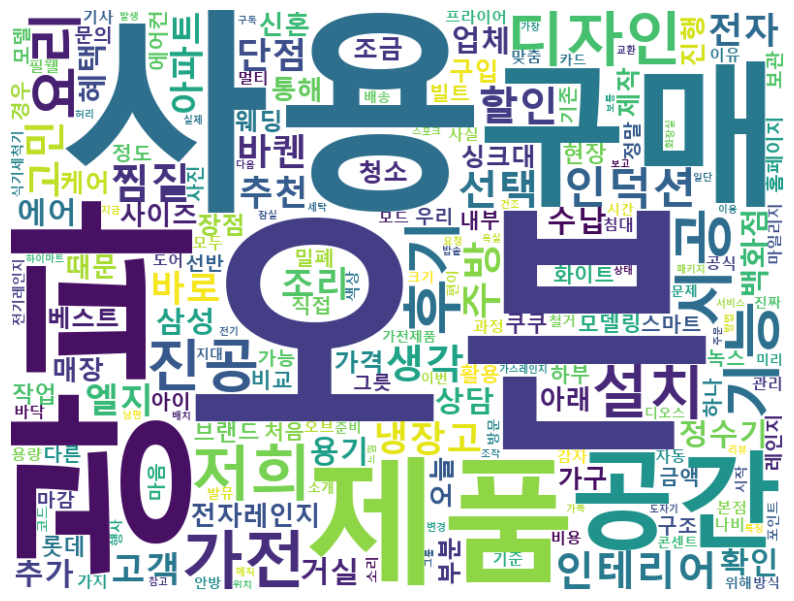

In [ ]:
#워드클라우드 이미지 표시하기
plt.figure(figsize=(10,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()